# 머신러닝 프로젝트 진행 과정

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

### 데이터셋 불러오기

In [46]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

### 데이터 구조 살펴보기

In [47]:
housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [48]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [49]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [50]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

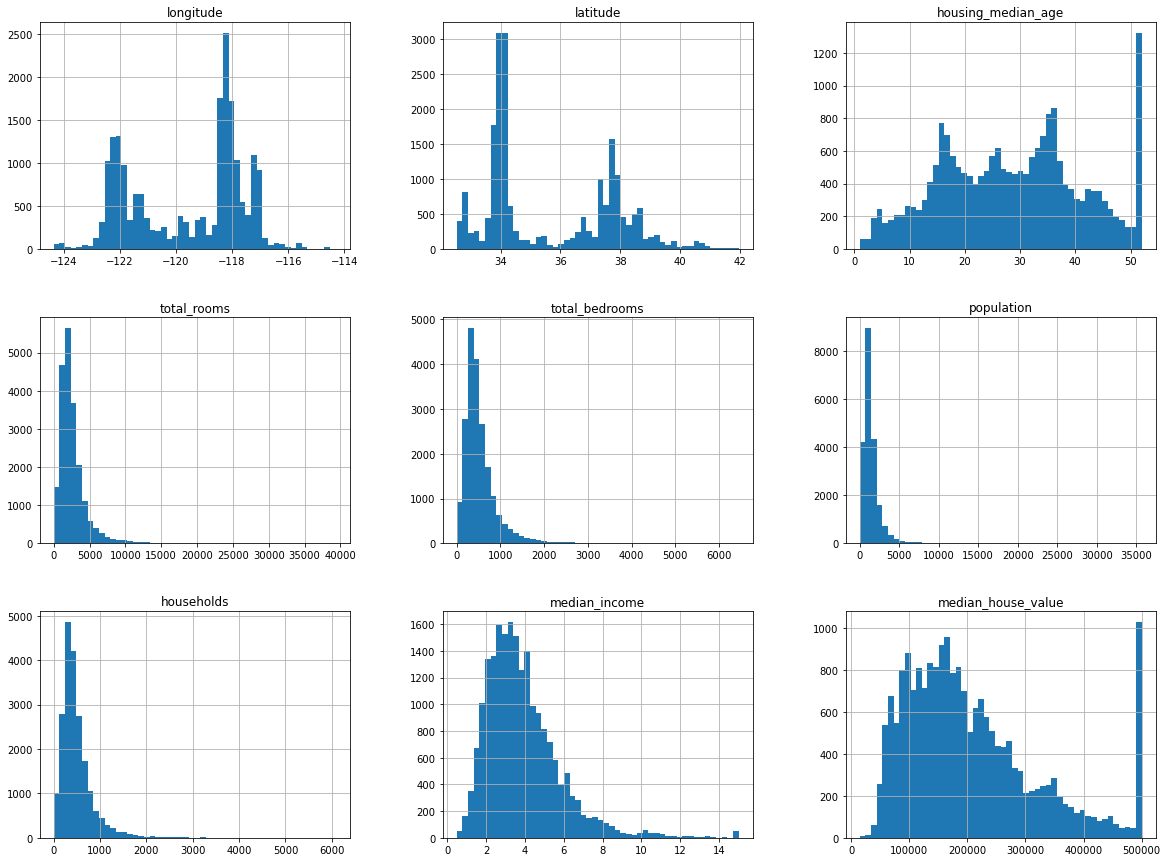

In [51]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
plt.show()

### 테스트 세트 만들기

In [52]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[ : test_set_size ]
    train_indices = shuffled_indices[ test_set_size : ]
    return data.iloc[ train_indices ], data.iloc[ test_indices ]

train_set, test_set = split_train_test(housing, 0.2)
print("{} train, {} test".format(len(train_set), len(test_set)))

16512 train, 4128 test


In [53]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<AxesSubplot:>

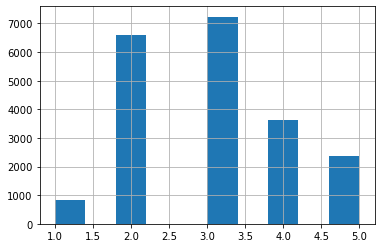

In [54]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
housing["income_cat"].hist()

In [55]:
housing["income_cat"].unique()

array([5., 4., 3., 2., 1.])

In [56]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
split

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)

In [57]:
split.split(housing, housing["income_cat"])

<generator object BaseShuffleSplit.split at 0x0000020960B2FAC0>

In [66]:
strat_train_set = None
strat_test_set = None

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [67]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [68]:
test_set["income_cat"] = np.ceil(test_set["median_income"] / 1.5)
test_set["income_cat"].where(test_set["income_cat"] < 5, 5.0, inplace=True)
test_set["income_cat"].value_counts() / len(test_set)

C:\Users\rksla\AppData\Local\Temp/ipykernel_8412/4133209938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["income_cat"] = np.ceil(test_set["median_income"] / 1.5)
C:\Users\rksla\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


3.0    0.358527
2.0    0.324370
4.0    0.167393
5.0    0.109496
1.0    0.040213
Name: income_cat, dtype: float64

In [69]:
start_test_set["income_cat"].value_counts() / len(test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [70]:
pd.concat(
    [
        housing["income_cat"].value_counts() / len(housing),
        test_set["income_cat"].value_counts() / len(test_set),
        start_test_set["income_cat"].value_counts() / len(test_set)
    ],
    axis=1
).sort_index()

income_cat  income_cat  income_cat
1.0    0.039826    0.040213    0.039729
2.0    0.318847    0.324370    0.318798
3.0    0.350581    0.358527    0.350533
4.0    0.176308    0.167393    0.176357
5.0    0.114438    0.109496    0.114583

In [71]:
housing.drop("income_cat", axis=1, inplace=True)

In [72]:
for set_ in (strat_train_set, start_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [73]:
housing = strat_train_set.copy()

### 시각화

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

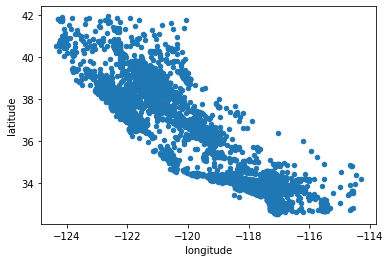

In [74]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

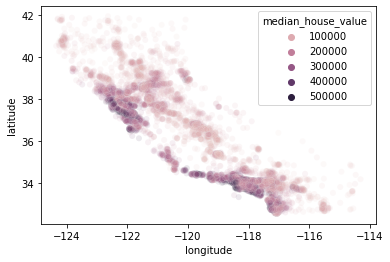

In [75]:
import seaborn as sns

sns.scatterplot(data=housing, x="longitude", y="latitude", alpha=0.1, hue="median_house_value")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

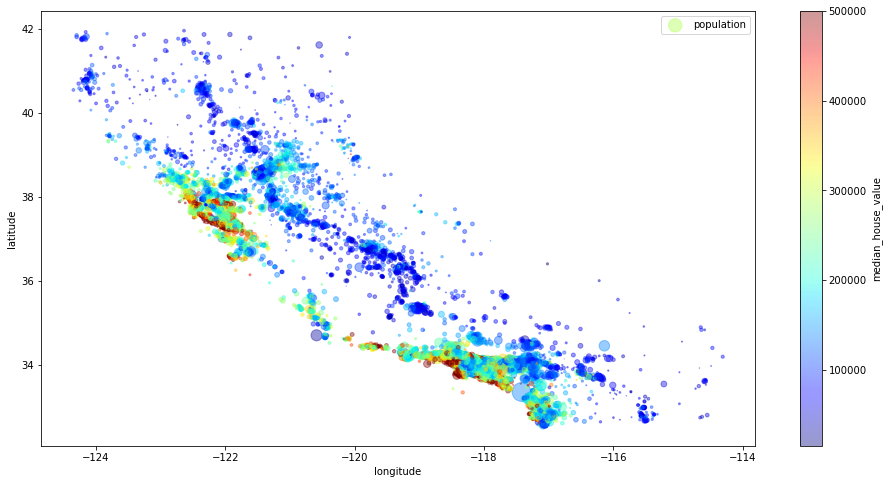

In [76]:
housing.plot(
    kind="scatter", x="longitude", y="latitude",
    alpha=0.4, figsize=(16, 8),
    s=housing["population"] / 100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, sharex=False
)

### 상관관계 조사

In [77]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

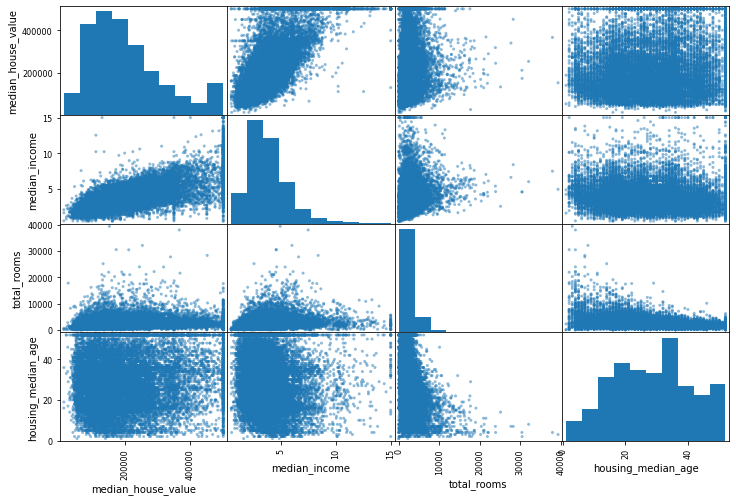

In [78]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

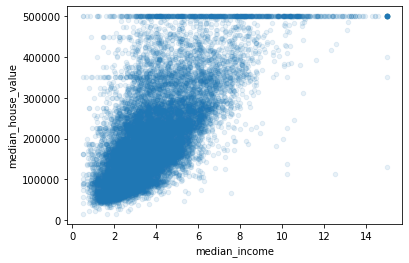

In [79]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

### 특성 추가: 분석 목적에 맞게 변형

In [80]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [81]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms                   -0.259984
Name: median_house_value, dtype: float64

### 데이터 준비 1: 정제

In [133]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [134]:
housing.dropna(subset=["total_bedrooms"])

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income ocean_proximity  
17606       710.0       339.0         2.7042       <1H OCEAN  
18632       306.0       113.0         6.4214       <1H OCEAN  
14650       936.0       462.0         2.8621      NEAR OCEAN  
3230       1460.0       353.0         1.8839          INLAND  
3555       4459.0      1463.0         3.0347       <1H OCEAN  
...           ...         ...            ...             ...  
6563        573.0       210.0         4.9312          INLAND  
12053      1052.0       258.0         2.0682          INLAND  
13908      2098.0       765.0         3.2723          INLAND  
11159      1356.0       356.0         4.0625       <1H OCEAN  
15775      1269.0       639.0         3.5750        NEAR BAY  

[16354 rows x 9 columns]

In [87]:
from sklearn.preprocessing import Imputer



ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (C:\Users\rksla\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [135]:
housing_cat = housing["ocean_proximity"]
housing_cat.head

<bound method NDFrame.head of 17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
            ...    
6563         INLAND
12053        INLAND
13908        INLAND
11159     <1H OCEAN
15775      NEAR BAY
Name: ocean_proximity, Length: 16512, dtype: object>

In [136]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded

array([0, 0, 1, ..., 2, 0, 3], dtype=int64)

In [137]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [138]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [139]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [140]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[ :, rooms_ix] / X[ :, household_ix]
        population_per_household = X[ :, population_ix] / X[ : , household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[ : , bedrooms_ix] / X[ : , rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
household_extra_attribs = attr_adder.transform(housing.values)

### 특성 스케일링: 모든 특성의 범위가 같도록 변환

In [141]:
"""
Pipeline 객체
    1. 객체 생성자의 인자로 처리할 작업을 튜플의 리스트 전달
        예시
            pl = Pipeline([ ("처리할 작업 1", 처리기1), (처리할 작업 2, 처리기2), ... ])
    2. Pipeline.fit_transform(처리할 객체)
"""

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

housing_num = housing.drop("ocean_proximity", axis=1)
housing_num_tr = num_pipeline.fit_transform(housing_num.values)

In [142]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.1912609 ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.93800768],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4951944 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.57983218],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.33114757],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.13032013]])

In [143]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelecor(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [144]:
from sklearn.impute import SimpleImputer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("selector", DataFrameSelecor(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("selector", DataFrameSelecor(cat_attribs)),
    ("cat_encoder", OneHotEncoder())
])

In [145]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

In [146]:
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 DataFrameSelecor(attribute_names=['longitude',
                                                                                   'latitude',
                                                                                   'housing_median_age',
                                                                                   'total_rooms',
                                                                                   'total_bedrooms',
                                                                                   'population',
                                                                                   'households',
                                                                                   'median_income'])),
                                                ('imputer',
                                       

In [147]:
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income ocean_proximity  
17606       710.0       339.0         2.7042       <1H OCEAN  
18632       306.0       113.0         6.4214       <1H OCEAN  
14650       936.0       462.0         2.8621      NEAR OCEAN  
3230       1460.0       353.0         1.8839          INLAND  
3555       4459.0      1463.0         3.0347       <1H OCEAN  
...           ...         ...            ...             ...  
6563        573.0       210.0         4.9312          INLAND  
12053      1052.0       258.0         2.0682          INLAND  
13908      2098.0       765.0         3.2723          INLAND  
11159      1356.0       356.0         4.0625       <1H OCEAN  
15775      1269.0       639.0         3.5750        NEAR BAY  

[16512 rows x 9 columns]

In [148]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

<16512x16 sparse matrix of type '<class 'numpy.float64'>'
	with 198144 stored elements in Compressed Sparse Row format>

In [149]:
housing.shape

(16512, 9)

In [150]:
housing_prepared

<16512x16 sparse matrix of type '<class 'numpy.float64'>'
	with 198144 stored elements in Compressed Sparse Row format>

# 모델 선정 및 훈련

### 훈련 세트에서 훈련하고 평가하기

In [151]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [152]:
some_data = housing.iloc[ : 5]
some_labels = housing_labels.iloc[ : 5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측: ", lin_reg.predict(some_data_prepared))

예측:  [210644.6045942  317768.80646185 210956.43342143  59218.98924712
 189747.55851288]


In [153]:
print("레이블: ", list(some_labels))

레이블:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [156]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [157]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [159]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### 교차 검증을 사용한 평가

In [160]:
"""
cross_val_score(
    검증할 모델,
    원본 자료,
    답,
    평가 방식,
    cv=검증 횟수
)
"""

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [161]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [68849.84952738 67209.16908161 71745.72788546 68960.0529888
 72074.03061074 75497.9673032  70902.62222455 70532.87758651
 77083.5839457  68917.58146547]
Mean:  71177.34626193998
Standard deviation:  2938.637796654571


In [162]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [66782.7384496  66960.11807177 70347.95253158 74739.57051913
 68031.1339053  71193.84184455 64969.63060293 68281.61137967
 71552.91569911 67665.10081635]
Mean:  69052.46138199918
Standard deviation:  2731.6740014474235


In [163]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

# 모델 세부 튜닝

### GridSearchCV를 이용한 하이퍼파라미터 탐색

In [166]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [3, 10, 30], "max_features": [2, 4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [3, 10], "max_features": [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(
    forest_reg, param_grid, cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [167]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64639.46322059912 {'max_features': 2, 'n_estimators': 3}
55597.72922522442 {'max_features': 2, 'n_estimators': 10}
52832.45399623578 {'max_features': 2, 'n_estimators': 30}
60388.01364172691 {'max_features': 4, 'n_estimators': 3}
53001.63938524108 {'max_features': 4, 'n_estimators': 10}
50483.63788646938 {'max_features': 4, 'n_estimators': 30}
58960.47884320505 {'max_features': 6, 'n_estimators': 3}
52358.96110729175 {'max_features': 6, 'n_estimators': 10}
50222.235500831186 {'max_features': 6, 'n_estimators': 30}
58469.38028616176 {'max_features': 8, 'n_estimators': 3}
51947.31425483836 {'max_features': 8, 'n_estimators': 10}
49966.56997361294 {'max_features': 8, 'n_estimators': 30}
62892.97363146284 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54353.39115867071 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59962.311487693354 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52311.30797297649 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [169]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.76084628e-02, 6.38692183e-02, 4.36462287e-02, 1.54546161e-02,
       1.52853454e-02, 1.51295524e-02, 1.44405708e-02, 3.87751265e-01,
       4.36877882e-02, 1.10037994e-01, 5.32864924e-02, 6.02082217e-03,
       1.58013134e-01, 1.21244334e-04, 2.22240346e-03, 3.42486198e-03])

In [ ]:
encoder.

In [175]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.categories_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.38775126511645885, 'median_income'),
 (0.11003799421425622, 'pop_per_hhold'),
 (0.06760846276437855, 'longitude'),
 (0.06386921826564836, 'latitude'),
 (0.053286492410256146, 'bedrooms_per_room'),
 (0.043687788219538656, 'rooms_per_hhold'),
 (0.043646228740187136, 'housing_median_age'),
 (0.015454616071210544, 'total_rooms'),
 (0.01528534540500044, 'total_bedrooms'),
 (0.015129552353926714, 'population'),
 (0.014440570801773888, 'households'),
 (0.006020822166409808, array([0, 1, 2, 3, 4], dtype=int64))]

In [176]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [177]:
final_rmse

47799.25571842564